# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [1]:
!pip3 install selenium


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
!pip3 install jpype1


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
!pip3 install konlpy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


## 2. 사용할 패키지 호출

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [2]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [3]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.2.19~2023.3.18'

In [4]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [5]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [6]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

"미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n헤어질 결심\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n노키즈존 확산, 어떻게 볼 것인가?\n부산시 반송동 정책이주지 주택 변화 연구\n대리모 산업의 윤리적 문제와 해결방안\n고교학점제의 쟁점과 과제 분석\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n한국 인공지능 교육의 방향\n최저임금제도 개선방안에 관한 연구\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n[토론문 1] 저출산·고령화와 인구정책\n그리스-로마 신화의 교훈\n인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교\n자연 상태에서 일어나는 음펨바 효과에 대한 연구\n신노년세대를 위한 노인복지주택에 관한 연구\n고교학점제 도입 추진 정책에 대한 비판적 검토\n디지털 정보활용능력이 노인의 삶의 만족도에 미치는 영향에 관한 연구\n간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향: 집단효능감의 매개효과\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\nThe Impact of Employees' Growth Mindset on Organizational Citizenship Behavior in Small and Medium-sized Enterprises (SMEs): Focusing on the Mediating Effect of Authentic Leadership\nDevelopment of Ill-Structured Problems for Elementary Learners to Learn by Computer-Based Modeling Tools\n남자간호사가 인지한 역할갈등, 수간호사 수퍼리더십, 간호조

In [7]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  헤어질 결심 스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 노키즈존 확산  어떻게 볼 것인가  부산시 반송동 정책이주지 주택 변화 연구 대리모 산업의 윤리적 문제와 해결방안 고교학점제의 쟁점과 과제 분석 촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 챗봇 기반 인공지능 교육 프로그램 개발과 적용 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 한국 인공지능 교육의 방향 최저임금제도 개선방안에 관한 연구 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로  토론문    저출산 고령화와 인구정책 그리스 로마 신화의 교훈 인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교 자연 상태에서 일어나는 음펨바 효과에 대한 연구 신노년세대를 위한 노인복지주택에 관한 연구 고교학점제 도입 추진 정책에 대한 비판적 검토 디지털 정보활용능력이 노인의 삶의 만족도에 미치는 영향에 관한 연구 간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향  집단효능감의 매개효과 미혼 성인남녀의 저출산 정책 인식에 관한 연구 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색                                                                                                                                                                                                                                                                                                남자간호사가 인지한 역할갈등  수간호사 수퍼리더십  간호조직문화가 조직몰입에 미치는 영향 대상관계이론의 

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [8]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '결심', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '노키즈존', '확산', '것', '부산시', '반송동', '정책이주', '주택', '변화', '연구', '대리모', '산업', '윤리적', '문제', '해결방안', '고교학점제', '쟁점', '과제', '분석', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '챗봇', '기반', '인공지능', '교육', '프로그램', '개발', '적용', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '한국', '인공지능', '교육', '방향', '최저임금제', '개선방안', '연구', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '토론문', '저출산', '고령화', '인구정책', '그리스', '로마', '신화', '교훈', '인지발달', '삐아제', '이론', '비고츠키', '이론', '비교', '자연', '상태', '음펨바', '효과', '연구', '노년세대', '노인복지주택', '연구', '고교학점제', '도입', '추진', '정책', '비판적', '검토', '디지털', '정보활용능력', '노인', '삶', '만족도', '영향', '연구', '간호관리자', '변혁적', '리더십', '서번트', '리더십', '신규간호사', '조직사회화', '영향', '집단효능감', '매개효과', '미혼', '성인남녀', '저출산', '정책', '식', '연구', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '남자간호사', '인지한', '역할갈등', '수간호사', '수퍼리더십', '간호조직문화', '조직몰입', '영향', '대상관계이론', '고찰', '상담적', '적용', '음악치료', '소개', '음악', '매개체', '특별', '우수

In [9]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
569,동향
570,분석
571,키워드
572,네트워크


In [10]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
569,동향,2
570,분석,2
571,키워드,3
572,네트워크,4


In [11]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
217,연구,22
262,인공지능,14
221,영향,12
139,분석,9
43,교육,7
...,...,...
154,사회,1
153,사형제도,1
152,사용법,1
151,사상체질,1


In [12]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [13]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


<AxesSubplot: xlabel='n', ylabel='word'>

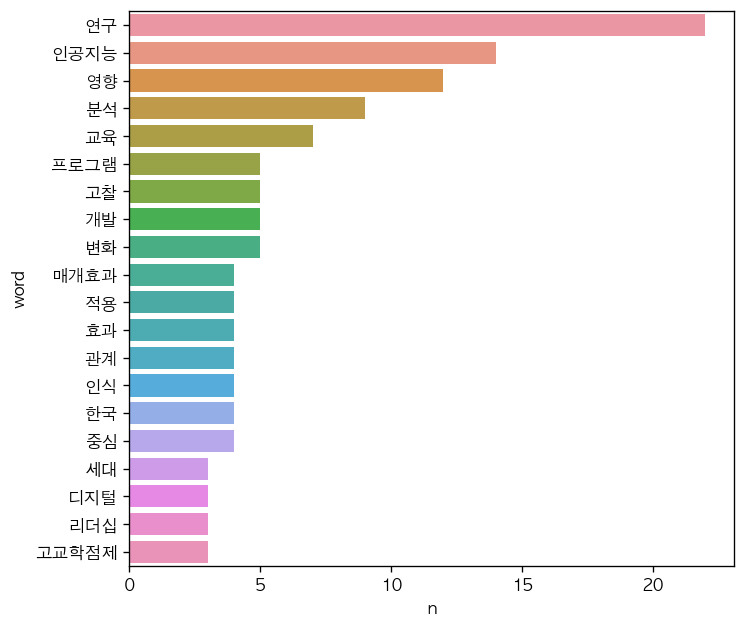

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [15]:
# 워드 클라우드 생성
!pip3 install wordcloud


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [16]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'연구': 22,
 '인공지능': 14,
 '영향': 12,
 '분석': 9,
 '교육': 7,
 '프로그램': 5,
 '고찰': 5,
 '개발': 5,
 '변화': 5,
 '매개효과': 4,
 '적용': 4,
 '효과': 4,
 '관계': 4,
 '인식': 4,
 '한국': 4,
 '중심': 4,
 '세대': 3,
 '디지털': 3,
 '리더십': 3,
 '고교학점제': 3,
 '의': 3,
 '대학': 3,
 '정책': 3,
 '간호사': 3,
 '사회적': 3,
 '동향': 3,
 '년': 3,
 '노인': 2,
 '팬데믹': 2,
 '대인관계': 2,
 '도입': 2,
 '인공지능교육': 2,
 '기술': 2,
 '패턴': 2,
 '상담': 2,
 '자연': 2,
 '리터러시': 2,
 '스마트시티': 2,
 '만족': 2,
 '장': 2,
 '삶': 2,
 '산업': 2,
 '저출산': 2,
 '문제': 2,
 '사례': 2,
 '사건': 2,
 '비판적': 2,
 '비교': 2,
 '방향': 2,
 '조직사회화': 2,
 '기반': 2,
 '병원': 2,
 '스트레스': 2,
 '공간': 2,
 '과제': 2,
 '개선방안': 2,
 '윤리': 2,
 '윤리적': 2,
 '관련': 2,
 '이론': 2,
 '간호대학생': 2,
 '현황': 2,
 '예술': 2,
 '교양교육': 2,
 '가족돌봄청년': 2,
 '필요': 2,
 '식': 2,
 '시사점': 2,
 '표준주의': 2,
 '역량': 2,
 '것': 2,
 '신규간호사': 2,
 '재직의도': 1,
 '융합형': 1,
 '융합교육': 1,
 '쟁점': 1,
 '저항성': 1,
 '적': 1,
 '윤리의식': 1,
 '을': 1,
 '음악': 1,
 '장애': 1,
 '전쟁': 1,
 '전문가': 1,
 '유효숫자': 1,
 '작품': 1,
 '전환': 1,
 '정보활용능력': 1,
 '유보통합': 1,
 '정서조절전략': 1,
 '위험': 1,
 '정책이주': 1,
 '웹툰': 1,
 '

In [17]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

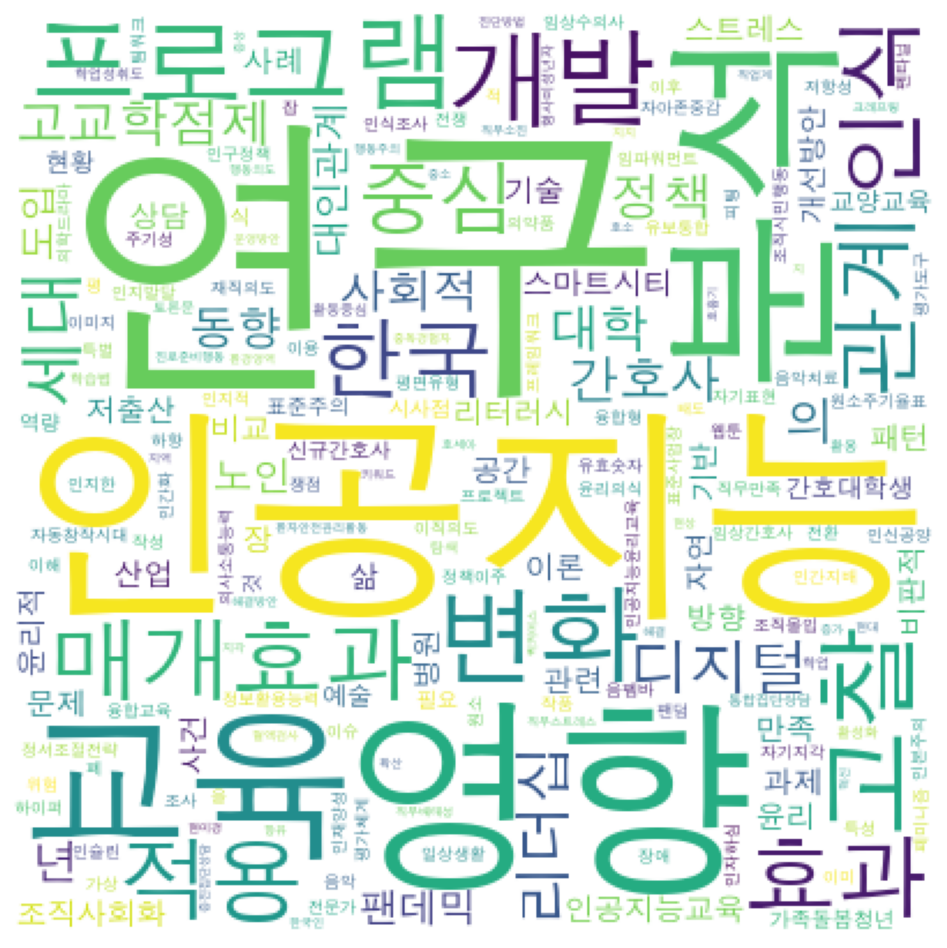

In [18]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud